Irfan's Code: Creating BOW

In [ ]:
!pip install rake-nltk # installing rake

# importing the required libraries and packages
from rake_nltk import Rake
import pandas as pd


In [ ]:
# reading the netflix data set and assigning columns. 
# Dropping any na values in the dataset.
df = pd.read_csv('/content/netflix_titles.csv') 
df = df[['title', 'type', 'director', 'cast','description']]
df = df.dropna()
df.head(3) # display the first 3

,title,type,director,cast,description
1,7:19,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",After a devastating earthquake hits Mexico Cit...
2,23:59,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","When an army recruit is found dead, his fellow..."
3,9,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","In a postapocalyptic world, rag-doll robots hi..."


In [ ]:
df['keywords'] = '' # creating a keyword column

for index, row in df.iterrows(): # iterating through the description and obtaining the keywords using rake
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    key_words_dict_scores = r.get_word_degrees()
    row['keywords'] = list (key_words_dict_scores.keys())

df.drop(columns=['description'], inplace=True) # remove the description column 
df.head(3) # display the first 3 data points

,title,type,director,cast,keywords
1,7:19,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","[walks, rescued, trapped, survivors, stay, ali..."
2,23:59,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","[forced, fellow, soldiers, confront, terrifyin..."
3,9,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","[doll, robots, hide, rag, exterminate, brave, ..."


In [ ]:
# mapping the data 
df['title'] = df['title'].map(lambda x: x.split(' '))
df['cast'] = df['cast'].map(lambda x: x.split(',')[:3])
df['director'] = df['director'].map(lambda x: x.split(','))
df['type'] = df['type'].map(lambda x: x.split(','))

# lowercase and joining the names, movies, and cast
for i, r in df.iterrows():
  r['title'] = [x.lower().replace(' ', '') for x in r['title']]
  r['cast'] = [x.lower().replace(' ', '') for x in r['cast']]
  r['director'] = [x.lower().replace(' ','') for x in r['director']]
  r['type'] = [x.lower().replace(' ','') for x in r['type']]

df.head(3) #looking at the first 3 data points

,title,type,director,cast,keywords
1,[7:19],[movie],[jorgemichelgrau],"[demiánbichir, héctorbonilla, oscarserrano]","[walks, rescued, trapped, survivors, stay, ali..."
2,[23:59],[movie],[gilbertchan],"[teddchan, stellachung, henleyhii]","[forced, fellow, soldiers, confront, terrifyin..."
3,[9],[movie],[shaneacker],"[elijahwood, johnc.reilly, jenniferconnelly]","[doll, robots, hide, rag, exterminate, brave, ..."


In [ ]:
df['BOW'] = '' #creaing a BOW coolumn 
columns = ['title', 'cast', 'director', 'type','keywords'] # the columns that will be added to the keywords 

# iterate over the data and add them to the keywords column
for index, row in df.iterrows():
  words = ' '
  for col in columns:
    words += ' '.join(row[col]) + ' '
    row['BOW'] = words

    
df2 = df[['BOW']] # assigning the datagrame 

In [ ]:
df2.head(50)

,BOW
1,7:19 demiánbichir héctorbonilla oscarserrano ...
2,23:59 teddchan stellachung henleyhii gilbertc...
3,9 elijahwood johnc.reilly jenniferconnelly sh...
4,21 jimsturgess kevinspacey katebosworth rober...
5,46 erdalbeşikçioğlu yaseminallen melisbirkan ...
6,122 aminakhalil ahmeddawood tareklotfy yasira...
7,187 samuell.jackson johnheard kellyrowan kevi...
8,706 divyadutta atulkulkarni mohanagashe shrav...
9,1920 rajneeshduggal adahsharma indraneilsengu...
10,1922 thomasjane mollyparker dylanschmid zakhi...


In [ ]:
df = pd.read_csv('/content/netflix_titles.csv') 
df = df.dropna()
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


In [ ]:
result = pd.concat([df['title'], df2['BOW']], axis=1)
result.head(3)

,title,BOW
1,7:19,7:19 demiánbichir héctorbonilla oscarserrano ...
2,23:59,23:59 teddchan stellachung henleyhii gilbertc...
3,9,9 elijahwood johnc.reilly jenniferconnelly sh...


In [ ]:
result['BOW'][150]

' a billion colour story dhruvapadmakumar gauravsharma vasuki padmakumarnarasimhamurthy movie increasingly intolerant world curious child idealistic interfaith parents observes family faces financial strain '

In [ ]:
result.to_csv('title_and_BOW.csv', index=False) # saving the data to be used for modeling

Irfan's code: linear search model

In [ ]:
# import required libraries and packages 
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [ ]:
df = pd.read_csv('/content/title_and_BOW.csv') # reading the dataset
df['title'] = df['title'].str.lower() # converting to str and lowercase all entire column
df.head(10)

,title,BOW
0,7:19,7:19 demiánbichir héctorbonilla oscarserrano ...
1,23:59,23:59 teddchan stellachung henleyhii gilbertc...
2,9,9 elijahwood johnc.reilly jenniferconnelly sh...
3,21,21 jimsturgess kevinspacey katebosworth rober...
4,46,46 erdalbeşikçioğlu yaseminallen melisbirkan ...
5,122,122 aminakhalil ahmeddawood tareklotfy yasira...
6,187,187 samuell.jackson johnheard kellyrowan kevi...
7,706,706 divyadutta atulkulkarni mohanagashe shrav...
8,1920,1920 rajneeshduggal adahsharma indraneilsengu...
9,1922,1922 thomasjane mollyparker dylanschmid zakhi...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import preprocessing


# Convert a collection of raw documents to a matrix of TF-IDF features.

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3), sublinear_tf=True)
X = vectorizer.fit_transform(df['BOW'])

y = df['title'].values.astype(str)

le = preprocessing.LabelEncoder() #using label encoder to encode text data
y = le.fit_transform(y) #passing in my target label to encode 

from sklearn.metrics.pairwise import linear_kernel
# creating my model

linear_model = linear_kernel(X)

title_index = pd.Series(df.index, index=df['title']).drop_duplicates() #indexing and removing and duplicates 


In [ ]:
# get recommendations function
# passing in my liner kernel model
def get_recommendations(title, linear_model=linear_model):
  title = title.lower() # lowercase the title
  index = title_index[title] # indexing
  scores = list(enumerate(linear_model[index])) # get the score into a list
  scores = sorted(scores, key=lambda x: x[1], reverse=True) # sorting in order
  scores = scores[1:11] # only the top ten excluding the input
  movie_index = [i[0] for i in scores] # getting the index

  
  return df['title'].iloc[movie_index],scores # returning the movie list and scores

In [ ]:
get_recommendations("a christmas prince") # calling the fucntion to get the best  match

(114              a christmas prince: the royal baby
 115           a christmas prince: the royal wedding
 155                        a princess for christmas
 928                         christmas with a prince
 4900                               woody woodpecker
 3208    prince of peoria: a christmas moose miracle
 3952                               the black prince
 4202                                       the king
 2584                                          maska
 3206                                         prince
 Name: title, dtype: object,
 [(114, 0.14348980328432034),
  (115, 0.13645974896559568),
  (155, 0.06789377722184348),
  (928, 0.059161605531370835),
  (4900, 0.036127787837933294),
  (3208, 0.03243150742855111),
  (3952, 0.03073643244670533),
  (4202, 0.03067709441074839),
  (2584, 0.030676217413052844),
  (3206, 0.030308661002913382)])

Irfan's code: Deep learning model with LSTM

In [ ]:
#import library/packages 
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.layers.core import Dense, Activation, Dropout



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('/content/title_and_BOW.csv') # reading the data file
df['title'] = df['title'].astype(str) # converting title to str object
df.head(3) # looking at the first 3 

,title,BOW
0,7:19,7:19 demiánbichir héctorbonilla oscarserrano ...
1,23:59,23:59 teddchan stellachung henleyhii gilbertc...
2,9,9 elijahwood johnc.reilly jenniferconnelly sh...


In [ ]:
sentences = df['BOW'].values  # getting the values in bag of words and assigning to sentences 
y = df['title'].values # getting the title values. This is the target data

In [ ]:
# tokenizing data with max words of 5000
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(sentences)

# obtaining the max sentence 
word_count = lambda sentences: len(word_tokenize(sentences))
longest_sentence = max(sentences, key=word_count)
max_sentence_len = len(word_tokenize(longest_sentence))

# vocabular size 
vocab_size = len(tokenizer.word_index)+1

sentences = tokenizer.texts_to_sequences(sentences) # convert text to a sequence of words (or tokens).

padded_docs = pad_sequences(sentences,maxlen=max_sentence_len) # pads the sequence to the same length 


In [ ]:
le = preprocessing.LabelEncoder() #using label encoder to encode text data
y = le.fit_transform(y) #passing in my target label to encode 

# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.30, random_state = 1000)
X_train.shape,y_train.shape

((3485, 46), (3485,))

In [ ]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# creating the model 
input_dim = X_train.shape[1]

model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_sentence_len))
model.add(BatchNormalization())

model.add(LSTM(128, input_shape=(X_train.shape[1:])))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(layers.Dense(7000, input_dim = input_dim,activation='relu'))
model.add(layers.Dense(7000, activation='sigmoid'))



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary() # summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 46, 50)            1480750   
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 50)            200       
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 7000)              903000    
_________________________________________________________________
dense_1 (Dense)              (None, 7000)              4

In [ ]:
history=model.fit(X_train,y_train, epochs=15, verbose=True, validation_data=(X_test,y_test),batch_size=256) # fit the data

Epoch 1/15
14/14 [==============================] - 19s 77ms/step - loss: 8.8708 - acc: 0.0247 - val_loss: 8.8584 - val_acc: 0.0368
Epoch 2/15
14/14 [==============================] - 1s 38ms/step - loss: 8.5418 - acc: 0.0348 - val_loss: 8.9360 - val_acc: 0.0368
Epoch 3/15
14/14 [==============================] - 1s 36ms/step - loss: 7.6740 - acc: 0.0344 - val_loss: 9.1277 - val_acc: 0.0368
Epoch 4/15
14/14 [==============================] - 1s 37ms/step - loss: 6.1099 - acc: 0.0386 - val_loss: 9.4219 - val_acc: 0.0368
Epoch 5/15
14/14 [==============================] - 0s 36ms/step - loss: 1.8551 - acc: 0.7707 - val_loss: 9.4479 - val_acc: 0.0341
Epoch 6/15
14/14 [==============================] - 1s 37ms/step - loss: 0.2307 - acc: 0.9631 - val_loss: 9.3260 - val_acc: 0.0268
Epoch 7/15
14/14 [==============================] - 1s 36ms/step - loss: 0.0482 - acc: 0.9927 - val_loss: 9.2375 - val_acc: 0.0281
Epoch 8/15
14/14 [==============================] - 1s 37ms/step - loss: 0.0258 - 

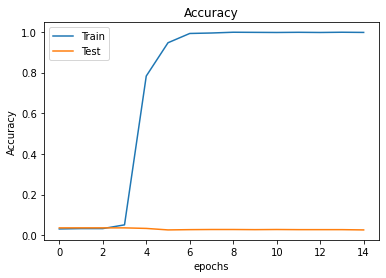

In [ ]:
# plotting the data
plt.figure()
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

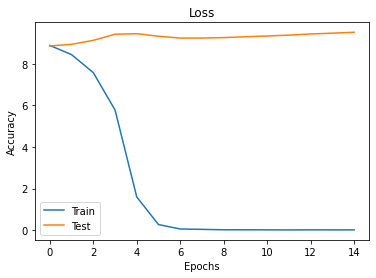

In [ ]:
# plotting the data
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Srikant's code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
#preprocessed data of netflix titles csv file
df = pd.read_csv("/Users/Administrator/PycharmProjects/GroupProjectSpring2021DeepLearningPython/csv_files/title_and_BOW.csv")
df['id'] = df.index+1
df.head()

,title,BOW,id
0,7:19,7:19 demiánbichir héctorbonilla oscarserrano ...,1
1,23:59,23:59 teddchan stellachung henleyhii gilbertc...,2
2,9,9 elijahwood johnc.reilly jenniferconnelly sh...,3
3,21,21 jimsturgess kevinspacey katebosworth rober...,4
4,46,46 erdalbeşikçioğlu yaseminallen melisbirkan ...,5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_metrix = CV.fit_transform(df['BOW'])

In [ ]:
cs = cosine_similarity(converted_metrix)
cs

array([[1.        , 0.04652421, 0.048795  , ..., 0.09304842, 0.04652421,
        0.048795  ],
       [0.04652421, 1.        , 0.04767313, ..., 0.04545455, 0.04545455,
        0.04767313],
       [0.048795  , 0.04767313, 1.        , ..., 0.04767313, 0.04767313,
        0.1       ],
       ...,
       [0.09304842, 0.04545455, 0.04767313, ..., 1.        , 0.04545455,
        0.04767313],
       [0.04652421, 0.04545455, 0.04767313, ..., 0.04545455, 1.        ,
        0.09534626],
       [0.048795  , 0.04767313, 0.1       , ..., 0.04767313, 0.09534626,
        1.        ]])

In [ ]:
#recommendation based on title, type, description
def get_recommendations(title):    
    if title is not None:
        title = title.lower()
        recom = df[df['BOW'].str.contains(title)]
    return recom

In [ ]:
title = input("Enter title name: ")
get_recommendations(title)

Enter title name: Teenage Mutant Ninja Turtles


,title,BOW,id
3874,Teenage Mutant Ninja Turtles,teenage mutant ninja turtles chrisevans sarah...,3875
3875,Teenage Mutant Ninja Turtles II: The Secret of...,teenage mutant ninja turtles ii: the secret o...,3876
3876,NaN,teenage mutant ninja turtles: the movie judit...,3877


In [ ]:
#this how we will get the id of the movie so we can check similarity between it and other movies
title = 'Teenage Mutant Ninja Turtles'
movie_id = df[df['title'] == title]['id'].index[0]
#similarity
score = list(enumerate(cs[movie_id]))
#now sort the similar movies in descending order
sorted_score = sorted(score, key=lambda x:x[1], reverse= True)
#we will ignore the first score because it will give us a 100% score because it's the same movie 
sorted_score = sorted_score[1:]
sorted_score

[(3876, 0.40022240757904204),
 (3875, 0.33580938097996493),
 (973, 0.21442250696755896),
 (2721, 0.17868542247296582),
 (4825, 0.17868542247296582),
 (4576, 0.16951587590520256),
 (1531, 0.1667593364912675),
 (2863, 0.1667593364912675),
 (2577, 0.16413304107465318),
 (3133, 0.16413304107465318),
 (2893, 0.16208817969462155),
 (3800, 0.15923243882462046),
 (2865, 0.1485562705416415),
 (2973, 0.14567140814584595),
 (1089, 0.14294833797837264),
 (3221, 0.14294833797837264),
 (310, 0.14037248126871926),
 (2862, 0.14037248126871926),
 (4290, 0.14037248126871926),
 (2557, 0.13793103448275862),
 (2870, 0.13130643285972257),
 (2869, 0.1293016367670472),
 (100, 0.12456821978060995),
 (961, 0.12456821978060995),
 (1128, 0.12456821978060995),
 (1771, 0.12456821978060995),
 (2390, 0.12456821978060995),
 (3119, 0.12456821978060995),
 (1656, 0.12156613477096617),
 (2861, 0.12156613477096617),
 (2908, 0.12156613477096617),
 (3040, 0.12156613477096617),
 (3543, 0.12156613477096617),
 (3695, 0.12156613

In [ ]:
movie_id

3874

[(0, 0.04052204492365539),
 (1, 0.039590379123244784),
 (2, 0.04152273992686998),
 (3, 0.04052204492365539),
 (4, 0.0),
 (5, 0.04376881095324086),
 (6, 0.09847982464479191),
 (7, 0.04152273992686998),
 (8, 0.042601432284230495),
 (9, 0.04152273992686998),
 (10, 0.04052204492365539),
 (11, 0.04152273992686998),
 (12, 0.04052204492365539),
 (13, 0.039590379123244784),
 (14, 0.037904902178945175),
 (15, 0.04152273992686998),
 (16, 0.038720154633118314),
 (17, 0.039590379123244784),
 (18, 0.08104408984731078),
 (19, 0.037904902178945175),
 (20, 0.038720154633118314),
 (21, 0.039590379123244784),
 (22, 0.04152273992686998),
 (23, 0.039590379123244784),
 (24, 0.09007546982220899),
 (25, 0.042601432284230495),
 (26, 0.042601432284230495),
 (27, 0.039590379123244784),
 (28, 0.07744030926623663),
 (29, 0.039590379123244784),
 (30, 0.037904902178945175),
 (31, 0.04152273992686998),
 (32, 0.038720154633118314),
 (33, 0.04052204492365539),
 (34, 0.11877113736973435),
 (35, 0.037139067635410375),
 

[(3876, 0.40022240757904204),
 (3875, 0.33580938097996493),
 (973, 0.21442250696755896),
 (2721, 0.17868542247296582),
 (4825, 0.17868542247296582),
 (4576, 0.16951587590520256),
 (1531, 0.1667593364912675),
 (2863, 0.1667593364912675),
 (2577, 0.16413304107465318),
 (3133, 0.16413304107465318),
 (2893, 0.16208817969462155),
 (3800, 0.15923243882462046),
 (2865, 0.1485562705416415),
 (2973, 0.14567140814584595),
 (1089, 0.14294833797837264),
 (3221, 0.14294833797837264),
 (310, 0.14037248126871926),
 (2862, 0.14037248126871926),
 (4290, 0.14037248126871926),
 (2557, 0.13793103448275862),
 (2870, 0.13130643285972257),
 (2869, 0.1293016367670472),
 (100, 0.12456821978060995),
 (961, 0.12456821978060995),
 (1128, 0.12456821978060995),
 (1771, 0.12456821978060995),
 (2390, 0.12456821978060995),
 (3119, 0.12456821978060995),
 (1656, 0.12156613477096617),
 (2861, 0.12156613477096617),
 (2908, 0.12156613477096617),
 (3040, 0.12156613477096617),
 (3543, 0.12156613477096617),
 (3695, 0.12156613

In [ ]:
#now showing the top 5 movies similar to the title
i = 0
for item in sorted_score:
    movie_title = df[df['id'] == item[0]]['title'].values[0]
    print(i+1,movie_title)
    i = i+1
    if i > 4:
        break

1 Teenage Mutant Ninja Turtles II: The Secret of the Ooze
2 Teenage Mutant Ninja Turtles
3 nan
4 Monster High: Escape from Skull Shores
5 Welcome to Monster High: The Origin Story


In [ ]:
pwd

'C:\\Users\\Administrator\\GroupProjectSpring2021DeepLearningPython\\sourcecode'

Divyanshi's code

In [ ]:
# Using TF-IDF Technique to create recommendation model with Sigmoid Kernal for movies and TV shows. The result helps in finding out similar movies and TV shows with the accuracy. 


# Import numpy and pandas

import numpy as np 
import pandas as pd

# Read the dataset

data = pd.read_csv("netflix_titles.csv")
print (data.shape)
data.head(5)

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Print the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Dropping the columns thata are not required

new_movies = data[data['type']=='Movie'].reset_index()
new_movies = new_movies.drop(columns = ['duration','country','date_added','release_year','show_id','type','index','listed_in'])

In [ ]:
 # Searching if there is any null values

new_movies['director'] = new_movies['director'].fillna("")
new_movies['cast'] = new_movies['cast'].fillna("")

# Combining columns such as description, cast and directors

new_movies['combined'] = new_movies['description']+new_movies['cast']+new_movies['director']
new_movies.head(5)

,title,director,cast,rating,description,combined
0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",TV-MA,After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",R,"When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",PG-13,"In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
3,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",PG-13,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...
4,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",TV-MA,"After an awful accident, a couple admitted to ...","After an awful accident, a couple admitted to ..."


In [ ]:
# Importing TfidVectorizer to find out the best recommendation

from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')

In [ ]:
new_movies['combined'] = new_movies['combined'].fillna("")

In [ ]:
# Using Sigmoid Kernal and creating the matrix

tfv_matrix = tfv.fit_transform(new_movies['combined'])
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig[0]
indices = pd.Series(new_movies.index,index = new_movies['title']).drop_duplicates()
indices

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


title
7:19                                          0
23:59                                         1
9                                             2
21                                            3
122                                           4
                                           ... 
Zoom                                       5372
Zozo                                       5373
Zubaan                                     5374
Zulu Man in Japan                          5375
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    5376
Length: 5377, dtype: int64

In [ ]:
# Creating a recommendation model to find similar movies 

def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return new_movies['title'].iloc[movies_indices],sig_scores
  

In [ ]:
recommend('Avengers: Infinity War')

(4895               Thor: Ragnarok
 3587     Resident Evil: Afterlife
 4140         Take Me Home Tonight
 1878                          Her
 4707     The Pursuit of Happyness
 605                 Before I Fall
 975     Chris D'Elia: Man on Fire
 179                 A Secret Love
 3449           Prescription Thugs
 5349         Yours, Mine and Ours
 Name: title, dtype: object,
 [(4895, 0.7616270181011502),
  (3587, 0.7616232966831555),
  (4140, 0.7616193098679381),
  (1878, 0.761617602870682),
  (4707, 0.7616143417188269),
  (605, 0.7616131942359952),
  (975, 0.7616130803234207),
  (179, 0.7616128661965993),
  (3449, 0.7616128656226869),
  (5349, 0.76161253836603)])

In [ ]:
recommend('Tarzan')

(4158                               Tarif de nuit
 4334                                 The Command
 808     Brian Regan: Nunchucks and Flamethrowers
 4707                    The Pursuit of Happyness
 2788                                     Maynard
 2082          Indiana Jones and the Last Crusade
 4171                                Teach Us All
 2182                 Jeff Dunham: Beside Himself
 3700                            S Is for Stanley
 4898                          Thorne: Sleepyhead
 Name: title, dtype: object,
 [(4158, 0.7616181393619372),
  (4334, 0.7616172582464316),
  (808, 0.7616150096251881),
  (4707, 0.7616148951884403),
  (2788, 0.7616146430974647),
  (2082, 0.7616145351898341),
  (4171, 0.7616138606485937),
  (2182, 0.7616135532341477),
  (3700, 0.7616131948927722),
  (4898, 0.761612689658796)])

In [ ]:
# Dropping the columns that are not required

tv_shows = data[data['type']=='TV Show'].reset_index()
tv_shows = tv_shows.drop(columns = ['duration','country','date_added','release_year','show_id','type','index','listed_in'])

In [ ]:
 # Searching if there is any null values

tv_shows['director'] = tv_shows['director'].fillna("")
tv_shows['cast'] = tv_shows['cast'].fillna("")

# Combining columns such as description, cast and directors

tv_shows['combined'] = tv_shows['description']+tv_shows['cast']+tv_shows['director']

In [ ]:
tv_shows.head()

,title,director,cast,rating,description,combined
0,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",TV-MA,In a future where the elite inhabit an island ...,In a future where the elite inhabit an island ...
1,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",TV-MA,A genetics professor experiments with a treatm...,A genetics professor experiments with a treatm...
2,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...",TV-MA,"In this dark alt-history thriller, a naïve law...","In this dark alt-history thriller, a naïve law..."
3,1994,Diego Enrique Osorno,,TV-MA,Archival video and new interviews examine Mexi...,Archival video and new interviews examine Mexi...
4,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",TV-14,"As a psychology professor faces Alzheimer's, h...","As a psychology professor faces Alzheimer's, h..."


In [ ]:
# Importing TfidVectorizer to find out the best recommendation

from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')
tv_shows['combined'] = tv_shows['combined'].fillna("")

In [ ]:
# Using Sigmoid Kernal and creating the matrix

tfv_matrix_shows = tfv.fit_transform(tv_shows['combined'])

from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix_shows,tfv_matrix_shows)
sig[0]
indices = pd.Series(tv_shows.index,index = tv_shows['title']).drop_duplicates()
indices

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


title
3%                          0
46                          1
1983                        2
1994                        3
Feb-09                      4
                         ... 
Zindagi Gulzar Hai       2405
Zoids Wild               2406
Zombie Dumb              2407
Zona Rosa                2408
Zumbo's Just Desserts    2409
Length: 2410, dtype: int64

In [ ]:
# Creating a recommendation model to find similar TV Shows
 
def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    shows_indices = [i[0] for i in sig_scores]
    return tv_shows['title'].iloc[shows_indices], sig_scores

In [ ]:
recommend('Iron Man: Armored Adventures')

(1977                                           The Hollow
 1923                                    The Dragon Prince
 383                       Cinderella and the Four Knights
 1076                  LEGO Jurassic World: Secret Exhibit
 2109                                        The Staircase
 1064    Learning Songs by Little Baby Bum: Nursery Rhy...
 1327             Mystery Science Theater 3000: The Return
 1159                                                Lupin
 1096               Little Baby Bum: Nursery Rhyme Friends
 759                                           Grand Hotel
 Name: title, dtype: object,
 [(1977, 0.761673673909367),
  (1923, 0.7616693914166767),
  (383, 0.7616568124636461),
  (1076, 0.7616491537416048),
  (2109, 0.7616452708075617),
  (1064, 0.7616438428587147),
  (1327, 0.7616435904246859),
  (1159, 0.7616431371729565),
  (1096, 0.7616400920896784),
  (759, 0.7616395289981868)])

In [ ]:
recommend("Grey's Anatomy")

(186                           Battle Creek
 531                Do Do Sol Sol La La Sol
 33                      A Boy Name Flora A
 385                             Cinta Iris
 386               Cinta Si Wedding Planner
 1905                             The Crime
 1650                           Secret City
 1514                             President
 859                               Hormones
 1998    The Irregular at Magic High School
 Name: title, dtype: object,
 [(186, 0.7616726260963065),
  (531, 0.7616689331625517),
  (33, 0.7616669835173516),
  (385, 0.7616617394345969),
  (386, 0.7616576078500836),
  (1905, 0.761651856791308),
  (1650, 0.7616503959954495),
  (1514, 0.7616485062865156),
  (859, 0.7616475372370397),
  (1998, 0.761647517158233)])